# Universality: U3 and CNOT decomposition (200 points)

In the explorer universality challenge we introduced the concept of universality but we focused only on a single qubit. Today we will make things more difficult. It has been proven that with the parametric gate U3 and the CNOT gate we can build any operator. In this exercise, we will be asked to work with the following matrix:

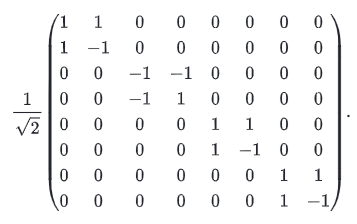

You are asked to create an operator in which only U3 and CNOT gates are used and whose associated matrix is the above. Remember that to check the matrix of an operator you can use the `qml.matrix` function. Let's see an example:

```python
def circuit():
    qml.PauliX(wires = 0)
    qml.Hadamard(wires = 1)
    

>> qml.matrix(circuit)()
```

```python
array([[ 0.        ,  0.        ,  0.70710678,  0.70710678],
       [ 0.        ,  0.        ,  0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678,  0.        ,  0.        ],
       [ 0.70710678, -0.70710678,  0.        ,  0.        ]])
```

To evaluate your solution, it will be checked that the matrices match and that the gates used are the ones allowed.

### Challenge code

You must complete the `circuit()` function below. Inside the function you simply have to include the necessary operations to generate the requested matrix.


#### Input and Output
In this challenge, we will not have inputs and outputs. The test will be done by checking that the matrix of your circuit coincides with that of the statement. When testing yourself, you can always print the matrix using `qml.matrix(circuit, wire_order=[0,1,2])`.
 
If your solution matches the correct one within the given tolerance specified in `check` (in this case it's a `1e-05` absolute error tolerance), the output will be `"Correct!"`. Otherwise, you will receive a `"Wrong answer"` prompt.

Good luck!

In [1]:
import functools
import json
import math
import pandas as pd
import pennylane as qml
import pennylane.numpy as np
import scipy

In [2]:
def circuit():
    """
    Succession of gates that will generate the requested matrix.
    This function does not receive any arguments nor does it return any values.
    """
    t1, t2, t3, t4, p1, p2, p3, p4, d1, d2, d3, d4=[ np.pi,  np.pi/2,  np.pi,
         np.pi/2, 3.56701113e+00, np.pi, 1.10603038e+00, 2.21686733e+00,
        2.03555793e+00, 9.24727050e-01, 2.71616983e+00, 0.0]
    qml.U3(t1,p1,d1,[0])
    qml.U3(t2,p2,d2, [1])
    qml.CNOT(wires=[0,1])
    qml.U3(t3,p3,d3,[0])
    qml.U3(t4,p4,d4,[1])
    qml.U3(np.pi/2,0.0,np.pi, wires=2)
    # Put your solution here ...
    # You only have to put U3 or CNOT gates

In [3]:
# These functions are responsible for testing the solution.

def run(input: str) -> str:
    matrix = qml.matrix(circuit)().real

    with qml.tape.QuantumTape() as tape:
        circuit()

    names = [op.name for op in tape.operations]
    return json.dumps({"matrix": matrix.tolist(), "gates": names})

def check(user_output: str, expected_output: str) -> str:
    parsed_output = json.loads(user_output)
    matrix_user = np.array(parsed_output["matrix"])
    gates = parsed_output["gates"]

    solution = (
        1
        / np.sqrt(2)
        * np.array(
            [
                [1, 1, 0, 0, 0, 0, 0, 0],
                [1, -1, 0, 0, 0, 0, 0, 0],
                [0, 0, -1, -1, 0, 0, 0, 0],
                [0, 0, -1, 1, 0, 0, 0, 0],
                [0, 0, 0, 0, 1, 1, 0, 0],
                [0, 0, 0, 0, 1, -1, 0, 0],
                [0, 0, 0, 0, 0, 0, 1, 1],
                [0, 0, 0, 0, 0, 0, 1, -1],
            ]
        )
    )

    assert np.allclose(matrix_user, solution)
    assert len(set(gates)) == 2 and "U3" in gates and "CNOT" in gates

In [4]:
test_cases = [['No input', 'No output']]

In [5]:
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input 'No input'...
Correct!
